Python 3.9.2 64-bit

Question 1 (a)
List the indices of the removed data points.

In [1]:
for i in range(2,96):
    for j in range (10):
        num1 = j*100
        num2 = (j+1)*100
        test_X_f = train_X[num1:num2]
        test_y_f = train_y[num1:num2]
        #add 9 sets together
        nine_x = np.concatenate((train_X[0:num1],train_X[num2:]),axis = 0)
        #add 9 sets together
        nine_y = np.concatenate((train_y[0:num1],train_y[num2:]),axis = 0)
        #fit
        clf_DEC = DecisionTreeClassifier(min_samples_leaf=i,random_state = 0)
        clf_DEC = clf_DEC.fit(nine_x,nine_y)
        y_pred = clf_DEC.predict(test_X_f)
        box[i-2].append(roc_auc_score(test_y_f, y_pred))
        if(roc_auc_score(test_y_f, y_pred) > higherCV):
            higherCV = roc_auc_score(test_y_f, y_pred)
            best = i

NameError: name 'train_X' is not defined

In [2]:
import pandas as pd
import datetime
import numpy
df = pd.read_csv('real_estate.csv')
removed = df[df.isnull().values==True]
removed.index+2


Int64Index([21, 43, 111, 146, 232, 303], dtype='int64')


then Remove all rows of the data that contain a missing (‘NA’) value

In [3]:
newdf = df.drop(removed.index)
newdf = newdf.reset_index(drop=True)
newdf3 = newdf.reset_index(drop=True)
newdf

,transactiondate,age,nearestMRT,nConvenience,latitude,longitude,price
0,2012.917,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5.0,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
403,2013.000,13.7,4082.01500,0.0,24.94155,121.50381,15.4
404,2012.667,5.6,90.45606,9.0,24.97433,121.54310,50.0
405,2013.250,18.8,390.96960,7.0,24.97923,121.53986,40.6
406,2013.000,8.1,104.81010,5.0,24.96674,121.54067,52.5


 delete all features from the dataset apart from: age, nearestMRT and nConvenience.

In [4]:
newdf2 = newdf[['age', 'nearestMRT', 'nConvenience']]
newdf = newdf[['age', 'nearestMRT', 'nConvenience','price']]
newdf2

,age,nearestMRT,nConvenience
0,32.0,84.87882,10.0
1,19.5,306.59470,9.0
2,13.3,561.98450,5.0
3,13.3,561.98450,5.0
4,5.0,390.56840,5.0
...,...,...,...
403,13.7,4082.01500,0.0
404,5.6,90.45606,9.0
405,18.8,390.96960,7.0
406,8.1,104.81010,5.0


In [5]:
def normalisation_apply(x,max,min):
    num = (x-min)/(max-min)
    return num
newdf['age'] = newdf['age'].apply(normalisation_apply,args=(newdf['age'].max(),newdf['age'].min()))
newdf['nearestMRT'] = newdf['nearestMRT'].apply(normalisation_apply,args=(newdf['nearestMRT'].max(),newdf['nearestMRT'].min()))
newdf['nConvenience'] = newdf['nConvenience'].apply(normalisation_apply,args=(newdf['nConvenience'].max(),newdf['nConvenience'].min()))
newdf.mean(axis=0)

<ipython-input-5-c711e1f32df6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['age'] = newdf['age'].apply(normalisation_apply,args=(newdf['age'].max(),newdf['age'].min()))
<ipython-input-5-c711e1f32df6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['nearestMRT'] = newdf['nearestMRT'].apply(normalisation_apply,args=(newdf['nearestMRT'].max(),newdf['nearestMRT'].min()))
<ipython-input-5-c711e1f32df6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

age              0.406079
nearestMRT       0.162643
nConvenience     0.412010
price           38.068627
dtype: float64

Question 2

Print out the first and last rows of  training set

In [6]:
trainning_df = newdf.head(int(len(newdf)*0.5))
trainingdf1 = trainning_df.iloc[[0, -1]]
trainingdf1

,age,nearestMRT,nConvenience,price
0,0.730594,0.009513,1.0,37.9
203,0.878995,0.099260,0.3,34.2


Print out the first and last rows of test set

In [7]:
test_df = newdf.tail(int(len(newdf)*0.5))
testdf = test_df.iloc[[0, -1]]
testdf

,age,nearestMRT,nConvenience,price
204,0.262557,0.206780,0.1,26.2
407,0.148402,0.010375,0.9,63.9


Question 5 
(a)

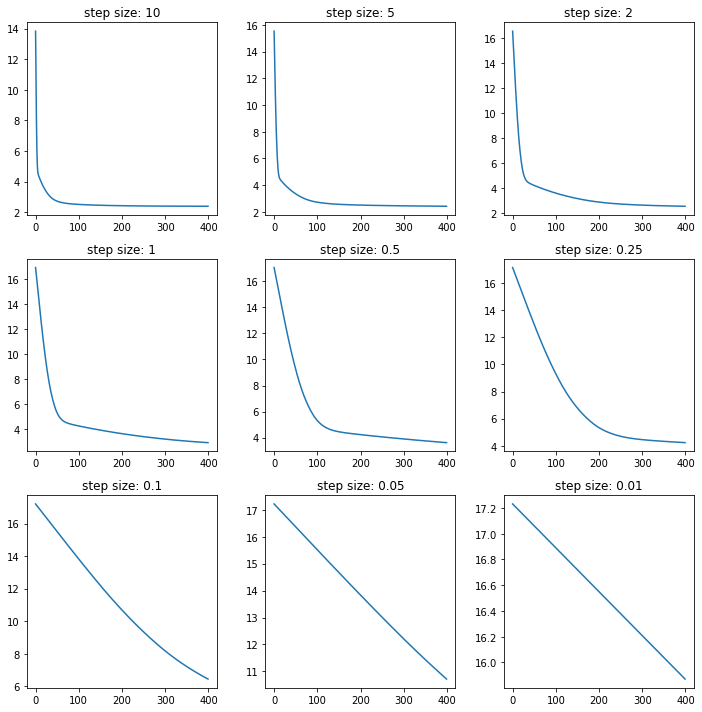

In [8]:
import matplotlib.pyplot as plt
target = newdf3['price']
age = newdf['age']
nMRT = newdf['nearestMRT']
nCon = newdf['nConvenience']
itr = 0 
w = [1,1,1,1]
w_e = [0,0,0,0]
def get_w(x):
	return (w[0]+w[1]*age[x]+w[2]*nMRT[x]+w[3]*nCon[x])-target[x]
alphas = [10,5,2, 1,0.5, 0.25,0.1, 0.05, 0.01]
losses = [[] for i in range(9)]
for i in range(len(alphas)):
	step = alphas[i]
	while itr<400:
		for j in range(204):
			buffer = get_w(j)
			new_w = buffer*0.5*((buffer**2)+4)**(-0.5)
			w_e[0]+=new_w
			w_e[1]+=new_w *age[j]
			w_e[2]+=new_w *nMRT[j]
			w_e[3]+=new_w *nCon[j]
		w[0] = w[0] - w_e[0]/204 *step
		w[1] = w[1] - w_e[1]/204*step
		w[2] = w[2] - w_e[2]/204*step
		w[3] = w[3] - w_e[3]/204*step
		loss = sum([((get_w(i)**2)/4+1)**(0.5)-1 for i in range(204)])/204
		losses[i].append(loss)
		itr= itr+1
		w_e = [0,0,0,0]
	itr = 0
	w = [1,1,1,1]
	
fig, ax = plt.subplots(3,3, figsize=(10,10))
for i, ax in enumerate(ax.flat):
	ax.plot(losses[i])
	ax.set_title(f"step size: {alphas[i]}") # plot titles
plt.tight_layout() # plot formatting
plt.show()



(b)

for step size I chose 0.5，cause all the lines are smooth so we pick the ones that have the most obvious change but aren't sudden,I think is 0.5s

(c)  


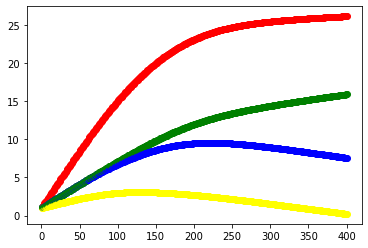

In [9]:
w = [1,1,1,1]
itr = 0
while itr<400:
    step = 0.3
    for j in range(204):
        buffer = get_w(j)
        new_w = buffer*0.5*((buffer**2)+4)**(-0.5)
        w_e[0]+=new_w
        w_e[1]+=new_w *age[j]
        w_e[2]+=new_w *nMRT[j]
        w_e[3]+=new_w *nCon[j]
    w[0] = w[0] - w_e[0]/204 *step
    w[1] = w[1] - w_e[1]/204*step
    w[2] = w[2] - w_e[2]/204*step
    w[3] = w[3] - w_e[3]/204*step
    loss = sum([((get_w(i)**2)/4+1)**(0.5)-1 for i in range(204)])/204
    itr= itr+1
    w_e = [0,0,0,0]
    plt.scatter(itr,w[0],color = "red",lable = "w")
    plt.scatter(itr,w[1],color = "blue")
    plt.scatter(itr,w[2],color = "yellow")
    plt.scatter(itr,w[3],color = "green")
itr = 0

w0:red  
w1:blue  
w2:yellow  
w3:green

and print out the final weight vector

In [10]:
print(w)

[26.11838075862762, 7.554954286320743, 0.22091266810394947, 15.882161070414401]


In [12]:
diff_y = np.dot(w.T, train_matrix[i])

ground = 2.0*pow((pow(diff_y - y[i],2) + 4),0.5)

            
err0[i] = (diff_y - y[i]) * train_matrix[i][0] / ground
            

NameError: name 'np' is not defined

In [14]:
w = [1,1,1,1]
itr = 0
step = 10
while itr<400:
	for j in range(204):
		buffer = get_w(j)
		new_w = buffer*0.5*((buffer**2)+4)**(-0.5)
		w_e[0]+=new_w
		w_e[1]+=new_w *age[j]
		w_e[2]+=new_w *nMRT[j]
		w_e[3]+=new_w *nCon[j]
	print (w)
	w[0] = w[0] - w_e[0]/204 *step
	w[1] = w[1] - w_e[1]/204*step
	w[2] = w[2] - w_e[2]/204*step
	w[3] = w[3] - w_e[3]/204*step
	loss = sum([((get_w(i)**2)/4+1)**(0.5)-1 for i in range(204)])/204
	itr= itr+1
	w_e = [0,0,0,0]
print('Train loss:',loss)
w = [1,1,1,1]
itr = 0
while itr<400:
	w_e = [0,0,0,0]
	for j in range(204):
		buffer = get_w(j)
		new_w = buffer*0.5*((buffer**2)+4)**(-0.5)
		w_e[0]+=new_w
		w_e[1]+=new_w *age[j]
		w_e[2]+=new_w *nMRT[j]
		w_e[3]+=new_w *nCon[j]
	w[0] = w[0] - w_e[0]/204 *step
	w[1] = w[1] - w_e[1]/204*step
	w[2] = w[2] - w_e[2]/204*step
	w[3] = w[3] - w_e[3]/204*step
	loss = sum([((get_w(i)**2)*0.25+1)**(0.5)-1 for i in range(204,408)])/204
	itr= itr+1
	w_e = [0,0,0,0]
print('Test loss:',loss)


[1, 1, 1, 1]
[5.985166287479791, 3.0774753306064615, 1.82032830651395, 3.0696611836087127]
[10.904138714039231, 5.12631134912275, 2.6205638684805828, 5.114142084837562]
[15.431499947967694, 6.960185451818171, 3.1869429573236934, 7.134119483122194]
[19.22375996044343, 8.41343420434821, 3.410284046976883, 9.058485464982827]
[22.103815532086085, 9.454058202921582, 3.322902672653487, 10.785522128174392]
[23.995116820088775, 9.937357485985357, 3.0643850079680246, 12.149079171684303]
[25.025446050370434, 9.906925974067061, 2.697784809824971, 13.105526110927853]
[25.49902227108379, 9.55796402568631, 2.2703038393461203, 13.77863590357811]
[25.760951333496987, 9.098627471181155, 1.8217862324495822, 14.33319691997757]
[25.941788185296165, 8.60077437924726, 1.3668687236807902, 14.835477401714044]
[26.090664523826348, 8.090934408980011, 0.9112307652585865, 15.310577715154865]
[26.22818860369929, 7.580379807947875, 0.4574196803504909, 15.768728267155002]
[26.36318045153496, 7.074125166383205, 0.006

Question 6 
(a)

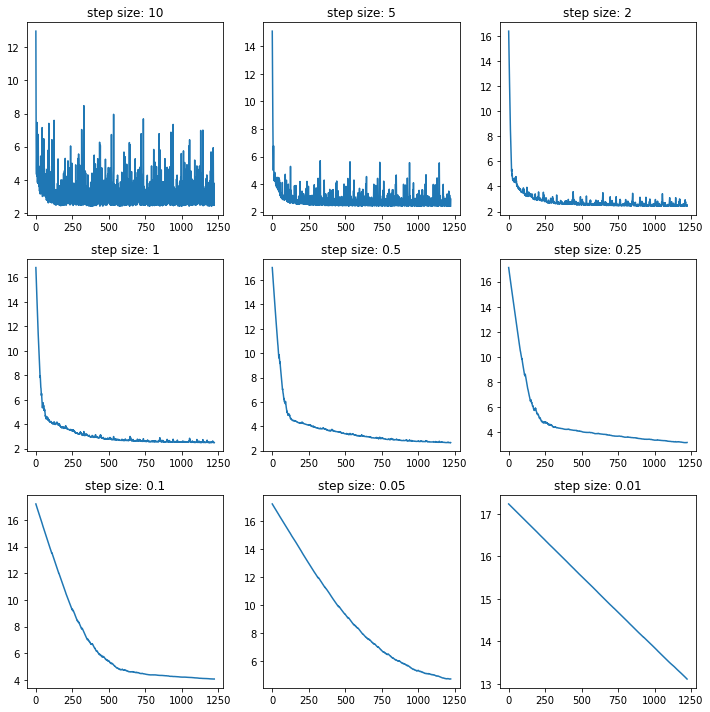

In [11]:

target = newdf3['price']
age = newdf['age']
nMRT = newdf['nearestMRT']
nCon = newdf['nConvenience']
itr = 0 
w = [1,1,1,1]
def get_w(x):
	return (w[0]+w[1]*age[x]+w[2]*nMRT[x]+w[3]*nCon[x])-target[x]
alphas = [10,5,2, 1,0.5, 0.25,0.1, 0.05, 0.01]
losses = [[] for i in range(9)]
epoche = 0
for j in range(len(alphas)):
    step = alphas[j]
    while epoche <6:
        for i in range(204):
            buffer = get_w(i)
            new_w = buffer*0.5*((buffer**2)+4)**(-0.5)
            w[0] = w[0] - new_w *step
            w[1] = w[1] - new_w *age[i]*step
            w[2] = w[2] - new_w *nMRT[i]*step
            w[3] = w[3] - new_w *nCon[i]*step
            loss = sum([((get_w(a)**2)*0.25+1)**(0.5)-1 for a in range(204)])/204 
            losses[j].append(loss)
        epoche += 1
    itr = 0
    epoche = 0
    w = [1,1,1,1]
fig, ax = plt.subplots(3,3, figsize=(10,10))
for i, ax in enumerate(ax.flat):
	ax.plot(losses[i])
	ax.set_title(f"step size: {alphas[i]}") # plot titles
plt.tight_layout() # plot formatting
plt.show()


(b)
for step size I chose 0.1，
firstly since we allways use big step size to check vast amounts of data to Save the number of code operations and small step size for small amounts of data to ensure the accuracy, If step size too small like 0.01 is hard to show the change and also waste too much time but too big step size like 10 is unstable so it has poor accuracy,so i chose '0.1' which is smooth and not cost a lot number of runs

(c)

In [1]:
w = [1,1,1,1]
itr = 0
itra = 0
while epoche <6:
    for itr in range(204):
        step = 0.4
        buffer = get_w(itr)
        new_w = buffer*0.5*((buffer**2)+4)**(-0.5)
        w[0] = w[0] - new_w *step
        w[1] = w[1] - new_w *age[itr]*step
        w[2] = w[2] - new_w *nMRT[itr]*step
        w[3] = w[3] - new_w *nCon[itr]*step
        itr= itr+1
        itra = itra+1
        plt.scatter(itra,w[0],color = "red",lable = "w0")
        plt.scatter(itra,w[1],color = "blue")
        plt.scatter(itra,w[2],color = "yellow")
        plt.scatter(itra,w[3],color = "green")
    epoche += 1
itr = 0

NameError: name 'epoche' is not defined

w0:red  
w1:blue  
w2:yellow  
w3:green 

and print out the final weight vector

In [15]:
print(w)

[42.562295977953866, -13.798114789196655, -32.17902981110446, 14.836389059805102]


In [16]:
w = [1,1,1,1]
itr = 0
step = 0.4
epoche = 0
while epoche <6:
    for i in range(204):
        buffer = get_w(i)
        new_w = buffer*0.5*((buffer**2)+4)**(-0.5)
        w[0] = w[0] - new_w *step
        w[1] = w[1] - new_w *age[i]*step
        w[2] = w[2] - new_w *nMRT[i]*step
        w[3] = w[3] - new_w *nCon[i]*step
        loss = sum([((get_w(a)**2)*0.25+1)**(0.5)-1 for a in range(204)])/204 
        losses[j].append(loss)
    epoche += 1
itr = 0
epoche = 0
w = [1,1,1,1]
print('Train loss:',loss)
while epoche <6:
    for i in range(204):
        buffer = get_w(i)
        new_w = buffer*0.5*((buffer**2)+4)**(-0.5)
        w[0] = w[0] - new_w *step
        w[1] = w[1] - new_w *age[i]*step
        w[2] = w[2] - new_w *nMRT[i]*step
        w[3] = w[3] - new_w *nCon[i]*step
        loss = sum([((get_w(a)**2)*0.25+1)**(0.5)-1 for a in range(204,408)])/204 
        losses[j].append(loss)
    epoche += 1
itr = 0
epoche = 0
w = [1,1,1,1]
print('Test loss:',loss)

IndexError: list index out of range

Question 7

step size for GD and SGD is use to precice the graph,if too big the graph will be unstable,if too small then the change will tends to be constant,so find a suitable step size is important.

After we done question 5 and 6,that we can find the line in question 5 is much smooth than question 6

First we have to think about what kinds of data are GD and SGD oriented, 

Gd check all of the data in every iteration to get the mean value of weight that will take long time but the data will be more accurate.(so we always use it to check the dataset that not to big)
SGD choose one random data to calculate the lose that save time but not accurate.(so we always use it to check huge amount dataset)
They are like two extremes, so for the same data set there will always have the better one in GD and SGD，for this question the largest dataset that we have is training data and test data which is 208,it's not a big number of data set,so obviously GD is better,thats the reason why it looks much smooth than SGD
